In [2]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")
os.getenv('PUI2016')

import os
import json

Populating the interactive namespace from numpy and matplotlib


In [3]:
os.getenv('PUI2016')

'/home/cusp/jc7344/PUI2016'

In [4]:
os.getenv('PUIDATA')

'/home/cusp/jc7344/PUIdata'

In [5]:
get_ipython().system("curl -O 'https://s3.amazonaws.com/tripdata/201601-citibike-tripdata.zip'")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 16.9M  100 16.9M    0     0  5859k      0  0:00:02  0:00:02 --:--:-- 6162k


In [6]:
#get_ipython().system('unzip 201601-citibike-tripdata.zip')

Archive:  201601-citibike-tripdata.zip
replace 201601-citibike-tripdata.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [7]:
df = pd.read_csv('201601-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1


In [8]:
df['date'] = pd.to_datetime(df['starttime'], format="%m/%d/%Y %H:%M:%S") 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1,2016-01-01 00:00:41
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1,2016-01-01 00:00:45
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2,2016-01-01 00:00:48
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2,2016-01-01 00:01:06
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1,2016-01-01 00:01:12


In [9]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

In [10]:
df['ageM'] = 2016 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2016 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

In [11]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,ageM,ageF
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1,2016-01-01 00:00:41,58.0,NaN
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1,2016-01-01 00:00:45,47.0,NaN
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2,2016-01-01 00:00:48,NaN,34.0
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2,2016-01-01 00:01:06,NaN,55.0
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1,2016-01-01 00:01:12,64.0,NaN


In [12]:
df.describe()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,ageM,ageF
count,5.094780e+05,509478.000000,509478.000000,509478.000000,509478.000000,509478.000000,509478.000000,509478.000000,484933.000000,509478.000000,379312.000000,104457.000000
mean,8.472119e+02,829.109149,40.737653,-73.986886,815.749591,40.737350,-73.987005,20275.420313,1975.996863,1.154570,40.344938,38.708330
std,7.396954e+03,988.824009,0.021554,0.015294,977.143503,0.060964,0.104780,3013.969144,11.679123,0.481242,11.646994,11.533688
min,6.100000e+01,72.000000,40.678907,-74.017134,72.000000,0.000000,-74.046305,14529.000000,1885.000000,0.000000,17.000000,16.000000
25%,3.310000e+02,328.000000,40.722281,-73.997236,326.000000,40.722281,-73.997262,17632.000000,NaN,1.000000,NaN,NaN
50%,5.230000e+02,449.000000,40.739323,-73.988557,447.000000,40.739017,-73.988900,20802.000000,NaN,1.000000,NaN,NaN
75%,8.430000e+02,519.000000,40.751873,-73.977910,519.000000,40.751873,-73.978059,23095.000000,NaN,1.000000,NaN,NaN
max,1.960017e+06,3244.000000,40.787209,-73.929891,3244.000000,40.787209,0.000000,24773.000000,2000.000000,2.000000,131.000000,90.000000


In [24]:
df['ageM'].dropna(inplace= True)
df['ageF'].dropna(inplace= True)

In [14]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,ageM,ageF
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1,2016-01-01 00:00:41,58.0,NaN
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1,2016-01-01 00:00:45,47.0,NaN
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2,2016-01-01 00:00:48,NaN,34.0
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2,2016-01-01 00:01:06,NaN,55.0
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1,2016-01-01 00:01:12,64.0,NaN


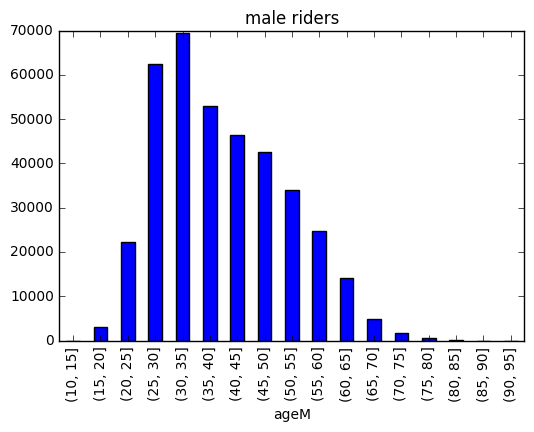

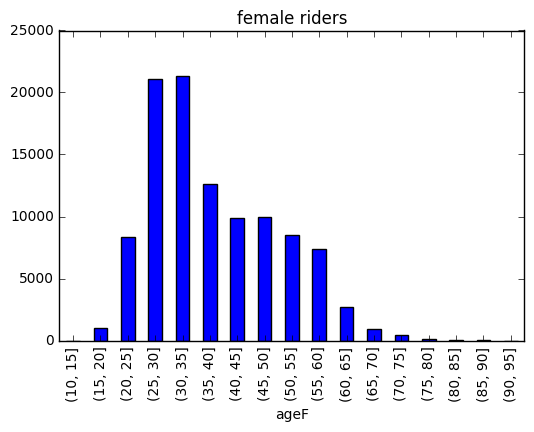

In [15]:
bins = np.arange(10, 99, 5)
axM = df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("male riders")
axF = df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("female riders")

          count_nonzero
ageM                   
(10, 15]       0.000000
(15, 20]       0.001770
(20, 25]       0.023480
(25, 30]       0.060992
(30, 35]       0.081838
(35, 40]       0.063330
(40, 45]       0.035835
(45, 50]       0.019082
(50, 55]       0.010831
(55, 60]       0.016579
(60, 65]       0.004844
(65, 70]       0.000670
(70, 75]       0.000492
(75, 80]       0.000170
(80, 85]       0.000019
(85, 90]       0.000000
(90, 95]       0.000000


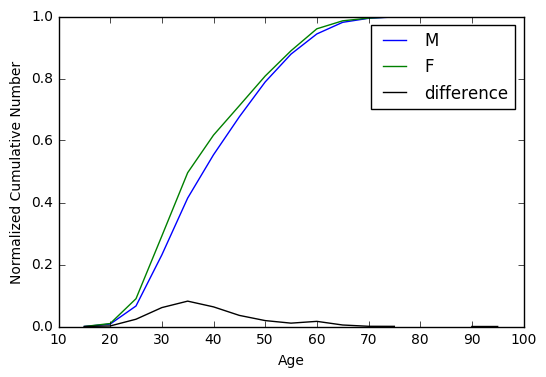

In [16]:
csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

In [17]:
import scipy.stats

In [18]:
ks = scipy.stats.ks_2samp(df.ageM, df.ageF)
print (ks)

Ks_2sampResult(statistic=0.10632017533641165, pvalue=0.0)


In [19]:
#H0 = There is negative or no correlation between the ages of males and females who use citibike  
#H1 = There is a correlation between the ages of males and females who use citibike 

In [20]:
condensed_df = df[::200]
condensed_df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,ageM,ageF
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1,2016-01-01 00:00:41,58.0,NaN
200,382,1/1/2016 00:41:57,1/1/2016 00:48:20,3163,Central Park West & W 68 St,40.773407,-73.977825,3172,W 74 St & Columbus Ave,40.778567,-73.977550,23155,Subscriber,1970.0,1,2016-01-01 00:41:57,46.0,NaN
400,1784,1/1/2016 01:13:55,1/1/2016 01:43:40,521,8 Ave & W 31 St,40.750967,-73.994442,401,Allen St & Rivington St,40.720196,-73.989978,14935,Customer,NaN,0,2016-01-01 01:13:55,NaN,NaN
600,373,1/1/2016 01:47:29,1/1/2016 01:53:42,405,Washington St & Gansevoort St,40.739323,-74.008119,358,Christopher St & Greenwich St,40.732916,-74.007114,24285,Subscriber,1947.0,1,2016-01-01 01:47:29,69.0,NaN
800,947,1/1/2016 02:25:24,1/1/2016 02:41:11,512,W 29 St & 9 Ave,40.750073,-73.998393,512,W 29 St & 9 Ave,40.750073,-73.998393,24013,Subscriber,1980.0,1,2016-01-01 02:25:24,36.0,NaN
1000,552,1/1/2016 03:09:04,1/1/2016 03:18:16,358,Christopher St & Greenwich St,40.732916,-74.007114,280,E 10 St & 5 Ave,40.733320,-73.995101,15762,Subscriber,1985.0,2,2016-01-01 03:09:04,NaN,31.0
1200,404,1/1/2016 04:10:33,1/1/2016 04:17:17,3101,N 12 St & Bedford Ave,40.720798,-73.954847,3106,Driggs Ave & N Henry St,40.723250,-73.943080,19860,Customer,NaN,0,2016-01-01 04:10:33,NaN,NaN
1400,286,1/1/2016 07:03:28,1/1/2016 07:08:14,228,E 48 St & 3 Ave,40.754601,-73.971879,352,W 56 St & 6 Ave,40.763406,-73.977225,22728,Subscriber,1982.0,1,2016-01-01 07:03:28,34.0,NaN
1600,383,1/1/2016 08:41:44,1/1/2016 08:48:07,462,W 22 St & 10 Ave,40.746920,-74.004519,3224,W 13 St & Hudson St,40.739974,-74.005139,16779,Subscriber,1972.0,2,2016-01-01 08:41:44,NaN,44.0
1800,302,1/1/2016 09:29:29,1/1/2016 09:34:31,265,Stanton St & Chrystie St,40.722293,-73.991475,400,Pitt St & Stanton St,40.719261,-73.981780,20344,Customer,NaN,0,2016-01-01 09:29:29,NaN,NaN


In [21]:
condensed_df['ageM'].dropna(inplace= True)
condensed_df['ageF'].dropna(inplace= True)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/core/series.py:2571: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


In [22]:
ks = scipy.stats.ks_2samp(condensed_df.ageM, condensed_df.ageF)
print (ks)

Ks_2sampResult(statistic=0.12632589640611697, pvalue=4.9009644695763118e-06)


In [23]:
#Since the value of d statistic is closer to 0, it means that both ageM and ageF were taken from the same sample.

In [25]:
df['ageM'].dropna(inplace= True)
df['ageF'].dropna(inplace= True)

In [26]:
sorted(df.ageM)
male_sort = sorted(df.ageM)
male_sort
#sorting the number of males. Laura Gladson was key for this point!

[17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,

In [38]:
sorted(df.ageF)
female_sort = sorted(df.ageF)
female_sort

[16.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 18.0,
 18.0,
 18.0,

In [39]:
a= len(df.ageM)
a

379312

In [40]:
b=len(df.ageF)
b

104457

In [41]:
print (a/b) 

3.63127411279


In [42]:
maleUsers_df = male_sort[::3]
len(maleUsers_df)

126438

In [43]:
len(maleUsers_df) - b

21981

In [44]:
21981/2

10990.5

In [56]:
men1 = maleUsers_df[10990:len(maleUsers_df)-10991] 

In [53]:
len(men1)

104456

In [57]:
pearson = scipy.stats.pearsonr(men1, female_sort)
print (pearson)

(0.99137956607824373, 0.0)


In [58]:
# Since the value of r is closer to 1, there is a strong correlation between the ages of the males and the females.

In [59]:
spearman = scipy.stats.spearmanr(men1, female_sort)
spearman

SpearmanrResult(correlation=0.99881543939182438, pvalue=0.0)

In [ ]:
# Since the value of r (0.000657) is closer to 1, there is a strong correlation between the ages of the males and the females